# Breast Tissue 

In [14]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [15]:
pd.set_option("display.max_columns", None)


## Getting the dataset

In [2]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00192/BreastTissue.xls -O breast_tissue.xls


File ‘breast_tissue.xls’ already there; not retrieving.


# Data Wrangling

In [17]:
data = pd.read_excel("breast_tissue.xls", sheet_name='Data')


Change attribute "Case #" to "patient_id"

In [18]:
data = data.rename(columns={"Case #": "patient_id"})


In [19]:
data.set_index("patient_id", inplace=True)


In [20]:
data.to_csv("breast_tissue_prepared.csv")


## ehrapy sanity check

In [21]:
adata = ep.io.read("breast_tissue_prepared.csv",
                   extension="csv",
                   index_column="patient_id")


In [22]:
ep.ad.type_overview(adata)


Variable names for AnnData object with 106 obs and 10 vars                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ Class -> data type: string                                                           
    ╠══ I0 -> data type: floating                                                            
    ╠══ PA500 -> data type: floating                                                         
    ╠══ HFS -> data type: floating                                                           
    ╠══ DA -> data type: floating                                                            
    ╠══ Area -> data type: floating                                                          
    ╠══ A/DA -> data type: floating                                                          
    ╠══ Max IP -> data type: floating                                                        
    ╠══ DR -> data type: floating                                                            
    ╚══ P -> data type: floating                                                             

In [23]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["Class"]}
)


... storing 'Class' as categorical


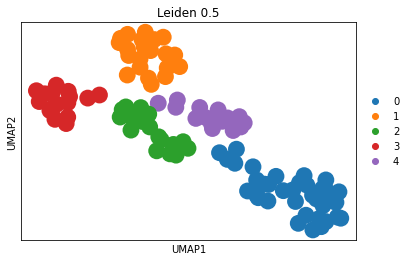

In [24]:
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")


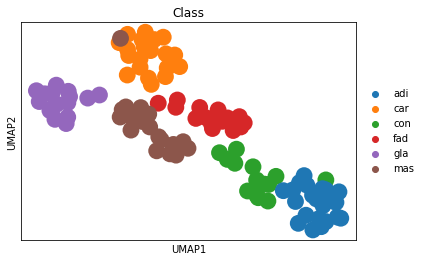

In [25]:
ep.pl.umap(adata, color=["Class"], ncols=1, wspace=0.75)
